<a href="https://colab.research.google.com/github/LahiruCooray/Board_Game_Review_Prediction/blob/main/Board_Game_Review_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
#Load the data
url = 'https://raw.githubusercontent.com/seanmckaybeck/scrapers/master/boardgamegeek/games.csv'
df = pd.read_csv(url)

In [12]:
#The created dataframe
df

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81307,184441,boardgameexpansion,Micro Rome: Aegyptus,2015.0,1.0,1.0,0.0,30.0,0.0,10.0,0,0.00000,0.00000,0,0,0,0,0,0,0.0000
81308,184442,boardgame,Trivial Pursuit: Marvel Cinematic Universe Da...,2013.0,2.0,0.0,0.0,0.0,0.0,12.0,0,0.00000,0.00000,0,0,0,0,0,0,0.0000
81309,184443,boardgame,BEARanoia,2015.0,2.0,15.0,1.0,1.0,1.0,0.0,0,0.00000,0.00000,0,0,0,0,0,0,0.0000
81310,184449,boardgame,Freight,2015.0,2.0,4.0,60.0,30.0,60.0,8.0,0,0.00000,0.00000,0,0,0,0,0,0,0.0000


In [9]:
from sklearn.model_selection import train_test_split


In [17]:
#print the shape of dataframe and coloumns
print(df.shape)
print(df.columns)

(81312, 20)
Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')


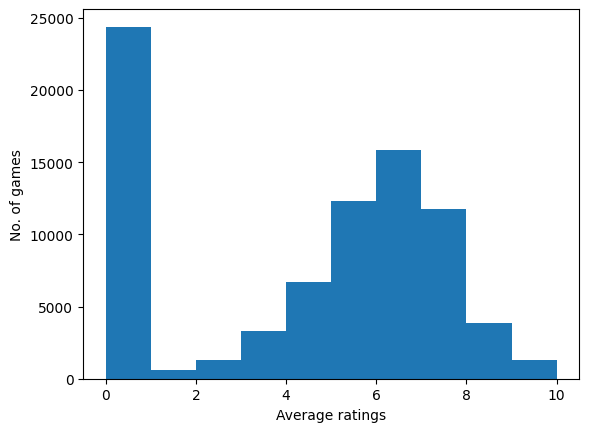

In [18]:
#The histogram of average ratings of games
plt.hist(df['average_rating'])
plt.xlabel('Average ratings')
plt.ylabel('No. of games')
plt.show()

In [31]:
#print the first row of the dataframe that has the games with zero ratings
print(df[df['average_rating']==0].iloc[0])


id                             318
type                     boardgame
name                    Looney Leo
yearpublished                  0.0
minplayers                     0.0
maxplayers                     0.0
playingtime                    0.0
minplaytime                    0.0
maxplaytime                    0.0
minage                         0.0
users_rated                      0
average_rating                 0.0
bayes_average_rating           0.0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                 0.0
Name: 13048, dtype: object


In [33]:
#Remove rows with zero reviews
df = df[df['users_rated'] > 0]
#Remove rows with missing values
df = df.dropna(axis = 0)

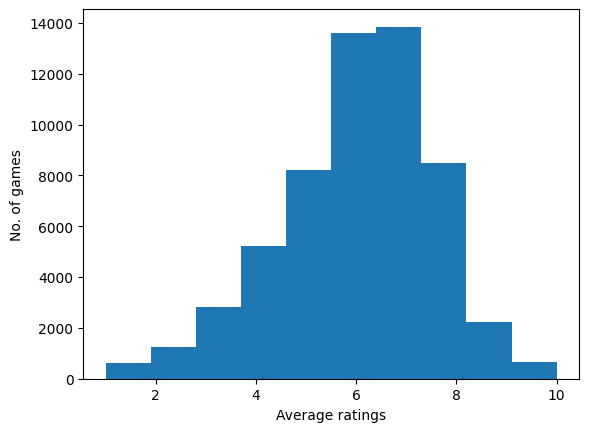

In [34]:
#Plot a histogram with the rest of average ratings
plt.hist(df['average_rating'])
plt.xlabel('Average ratings')
plt.ylabel('No. of games')
plt.show()

<ipython-input-66-a3386559491a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df.corr()


<Axes: >

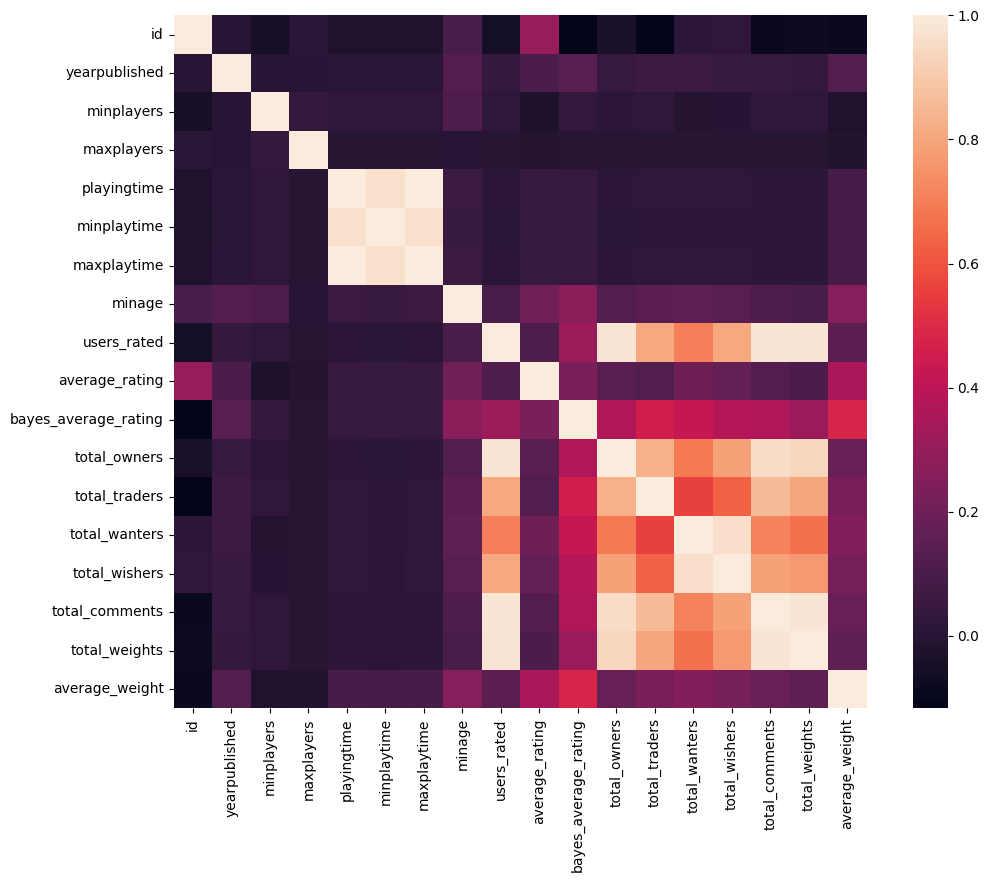

In [66]:
#Correlation matrix
corr_mat = df.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(corr_mat,square=True)
#corr_mat

In [79]:
#Get all the columns from dataframe
columns = df.columns.tolist()

#Remove columns we do not need
columns = [c for c in columns if c not in ['bayes_average_rating','id','name','type','average_rating']]
target = 'average_rating'
print(columns)


['yearpublished', 'minplayers', 'maxplayers', 'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated', 'total_owners', 'total_traders', 'total_wanters', 'total_wishers', 'total_comments', 'total_weights', 'average_weight']


In [59]:
#Splitting the dataset into 80% training and 20% testing
Y = df[target].values
X = df[columns].values
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)


(45515, 15) (11379, 15) (45515,) (11379,)


In [62]:
#import Linear Regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
LRmodel = LinearRegression()
#fit the model with training data
LRmodel.fit(X_train,Y_train)

LinearRegression()

In [64]:
#Generate predictions for the test dataset
predictions = LRmodel.predict(X_test)

#find error between predictions and actual values
mean_squared_error(Y_test,predictions)

2.0660105522501926

In [67]:
#Import the random forest model
from sklearn.ensemble import RandomForestRegressor

RFRmodel = RandomForestRegressor(n_estimators = 100,min_samples_leaf = 10 ,random_state = 1)


In [68]:
#Fit the model with training data
RFRmodel.fit(X_train,Y_train)

RandomForestRegressor(min_samples_leaf=10, random_state=1)

In [69]:
#Generate predictions using trained random forest regressor
predictions_2 = RFRmodel.predict(X_test)

#compute the error between predictions and actual values
mean_squared_error(Y_test,predictions_2)


1.4176772950125434

In [78]:
singleTest = X_test[0].reshape(1,-1)

In [77]:
#predictions of the both models for a single row of test data
LRprediction = LRmodel.predict(singleTest)
RFRprediction = RFRmodel.predict(singleTest)
print('LR prediction:',LRprediction[0])
print('RFR prediction:',RFRprediction[0])

LR prediction: 6.531587849948972
RFR prediction: 7.315272043326884


In [76]:
#print out the actual value
print(Y_test[0])

6.49333
